In [34]:
import sys
sys.path.insert(0,'../scripts/')

In [35]:
from extract_dataframe import read_json
from extract_dataframe import TweetDfExtractor
from clean_tweets_dataframe import Clean_Tweets

In [36]:
import json
import pandas as pd
from textblob import TextBlob

def read_json(json_file: str)->list:
   
    tweets_data = []
    for tweets in open(json_file,'r'):
        tweets_data.append(json.loads(tweets))
    
    
    return len(tweets_data), tweets_data

In [37]:
import warnings
warnings.filterwarnings('ignore')
from clean_tweets_dataframe import Clean_Tweets
import pandas as pd

In [38]:
train_df=pd.read_csv('../data/processed_tweet_data.csv')
#test_df=pd.read_csv('test_processed_tweet_data.csv')

In [39]:
#A class oject called cleaner is initialized to clean the dataset
cleaner = Clean_Tweets(train_df)

Automation in Action...!!!


In [40]:
cleaned_data_train= cleaner.clean_df(train_df)

In [41]:
cleaned_data_train.shape

(16472, 14)

The dataset has 14 columns and 16,472 rows

In [42]:
cleaned_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16472 entries, 38 to 24622
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   created_at       16472 non-null  datetime64[ns, UTC]
 1   source           16472 non-null  object             
 2   original_text    16472 non-null  object             
 3   polarity         16472 non-null  float64            
 4   subjectivity     16472 non-null  float64            
 5   lang             16472 non-null  object             
 6   favorite_count   16472 non-null  int64              
 7   retweet_count    16472 non-null  int64              
 8   original_author  16472 non-null  object             
 9   followers_count  16472 non-null  int64              
 10  friends_count    16472 non-null  int64              
 11  hashtags         16472 non-null  object             
 12  user_mentions    16472 non-null  object             
 13  place          

The dataset has four distimct data types:data,time ,int,float and object

In [43]:
cleaned_data_train.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,hashtags,user_mentions,place
38,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,en,0,43,davideiacovozzi,18,55,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",North East England
39,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,0.15,0.175000,en,0,32,davideiacovozzi,18,55,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",Germany
41,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,0,26,davideiacovozzi,18,55,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...","Prague, Czech Republic"
42,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,en,0,213,davideiacovozzi,18,55,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",Join free newsletter here...
43,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,en,0,417,davideiacovozzi,18,55,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",Click link below for a free trial:


In [44]:
cleaned_data_train.isnull().count()

created_at         16472
source             16472
original_text      16472
polarity           16472
subjectivity       16472
lang               16472
favorite_count     16472
retweet_count      16472
original_author    16472
followers_count    16472
friends_count      16472
hashtags           16472
user_mentions      16472
place              16472
dtype: int64

There are no missing values in the datasets

In [45]:
cleaned_data_train.describe()

,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,16472.000000,16472.000000,16472.000000,16472.000000,1.647200e+04,16472.000000
mean,0.088526,0.313992,7.274951,623.669439,5.327892e+04,1339.298567
std,0.279722,0.316429,529.536410,7083.382516,4.315926e+05,2970.206218
min,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.120000e+02,113.000000
50%,0.000000,0.288889,0.000000,2.000000,5.370000e+02,433.000000
75%,0.200000,0.527778,0.000000,33.000000,2.131000e+03,1433.000000
max,1.000000,1.000000,67814.000000,434379.000000,6.027402e+06,41866.000000


-The columns of significance to us are polarity and subjectivity.Polarity is whatr gives us the sentiment and it is a value that ranges from [-1,1].A value below 0 is a negative sentiment while one above zero is a positive sentiment.
-The subjectivity column implies pulic opininion if it tends to zer and a 1 if it is a fact.

In [46]:
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    cleaned_data_train['sentiments'] = cleaned_data_train['polarity'].apply(getAnalysis)

In [47]:
cleaned_data_train['sentiments'] = cleaned_data_train['polarity'].apply(getAnalysis)

In [48]:
cleaned_data_train.sentiments.value_counts(normalize= True)

Neutral     0.453254
Positive    0.383378
Negative    0.163368
Name: sentiments, dtype: float64

In [49]:
cleaned_data_train.sentiments.value_counts()

Neutral     7466
Positive    6315
Negative    2691
Name: sentiments, dtype: int64

45% of the dataset has neutral comments
38% are positive 
while 16% are negative

In [50]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [51]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from gensim import corpora
import pandas as pd
import statistics
import string
from textblob import TextBlob
import sys
import tweepy
import pandas as pd
import numpy as np
import os
import nltk
import time
import seaborn as sns
import pycountry
import re
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
!pip3 install langdetect
from langdetect import detect

In [52]:
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
# Function to remove punctuations, links, emojis, and stop words
def preprocessTweets(tweet):
    tweet = tweet.lower()  #has to be in place
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
    tweet = re.sub(r'rt', '', tweet)
    # Remove stopwords
    from nltk.tokenize import word_tokenize
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    
    #filtered_words = [w for w in filtered_words if w in word_list]

    # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them




In [54]:
# Defining my NLTK stop words and my user-defined stop words
#stop_words = list(stopwords.words('english'))
stop_words = set(STOPWORDS)
#alphabets = list(string.ascii_lowercase)
stop_words = stop_words  
#word_list = words.words()  # all words in English language
#emojis = list(UNICODE_EMO.keys())  # full list of emojis

In [55]:
# Apply preProcessTweets function to the 'Tweet' column to generate a new column called 'Processed Tweets'.

cleaned_data_train['clean_tweet'] = cleaned_data_train['original_text'].apply(preprocessTweets)

In [56]:
# function to return words to their base form using Lemmatizer
from nltk.tokenize import word_tokenize
def preprocessTweetsSentiments(tweet):
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

In [57]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [58]:
# Apply preprocessTweetsSentiments function to the 'Processed Tweets' column to generate a new column
# called 'Processed_Tweets'
cleaned_data_train['Tweets_Sentiments'] = cleaned_data_train['clean_tweet'].apply(preprocessTweetsSentiments)

In [59]:

#  function to write results to csv
cleaned_data_train.to_csv('../data/Processed_train.csv',encoding='utf-8-sig', index=False) 
# Also, encoding is important when writing text to csv file

# univariate analysis on hashtags

In [60]:
#Method to find hashtags from tweets
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [61]:
# update Hashtage columon with hashtages extracted from Orignal_text columon
cleaned_data_train['hashtags'] = cleaned_data_train.original_text.apply(find_hashtags)
print(cleaned_data_train['hashtags'])

38       [#gold, #silver, #crypto]
39                              []
41                              []
42                              []
43                              []
                   ...            
24584                           []
24586                           []
24596                           []
24599                           []
24622                           []
Name: hashtags, Length: 16472, dtype: object


In [62]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df_train = cleaned_data_train.loc[
                       cleaned_data_train.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [63]:
 #create dataframe where each use of hashtag gets its own row
flattened_hashtags_df_train = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df_train.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [64]:
#add flatten_hashtags to tweet_df
cleaned_data_train["flattened_hashtags"]= flattened_hashtags_df_train

<AxesSubplot:>

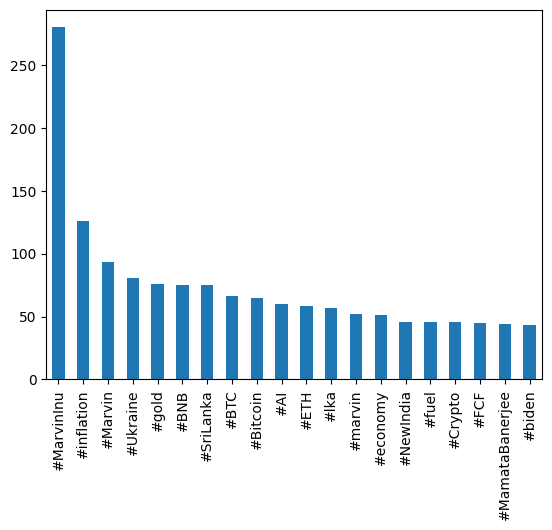

In [65]:
# To plot Top 20 Hashtags
cleaned_data_train['flattened_hashtags'].value_counts()[:20].plot(kind='bar')


In [67]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(cleaned_data_train.clean_tweet)

sum_words = words.sum(axis=0)

words_freq_train = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq_train = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

NameError: name 'words_freq' is not defined

Text(0.5, 1.0, 'WordCloud - Vocabulary from all words in train set')

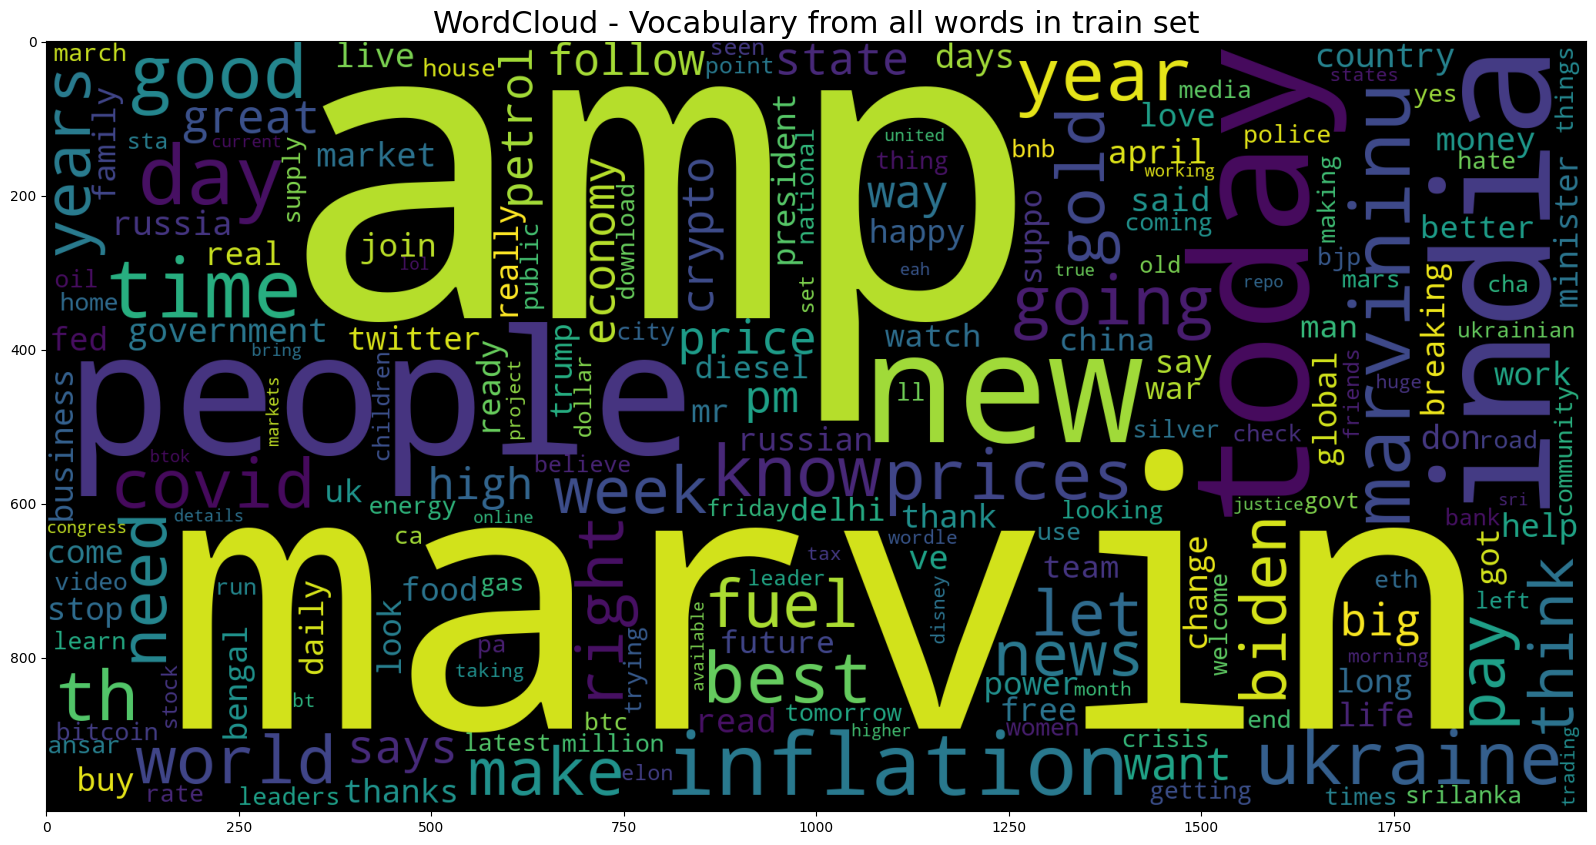

In [ ]:
wordcloud = WordCloud(background_color = 'black', width = 2000, height = 1000).generate_from_frequencies(dict(words_freq_train))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from all words in train set", fontsize = 22)

#normal_words =' '.join([text for text in cleaned_data['cleaned_tweet_extensive'][cleaned_data['polarity'] == 0]])

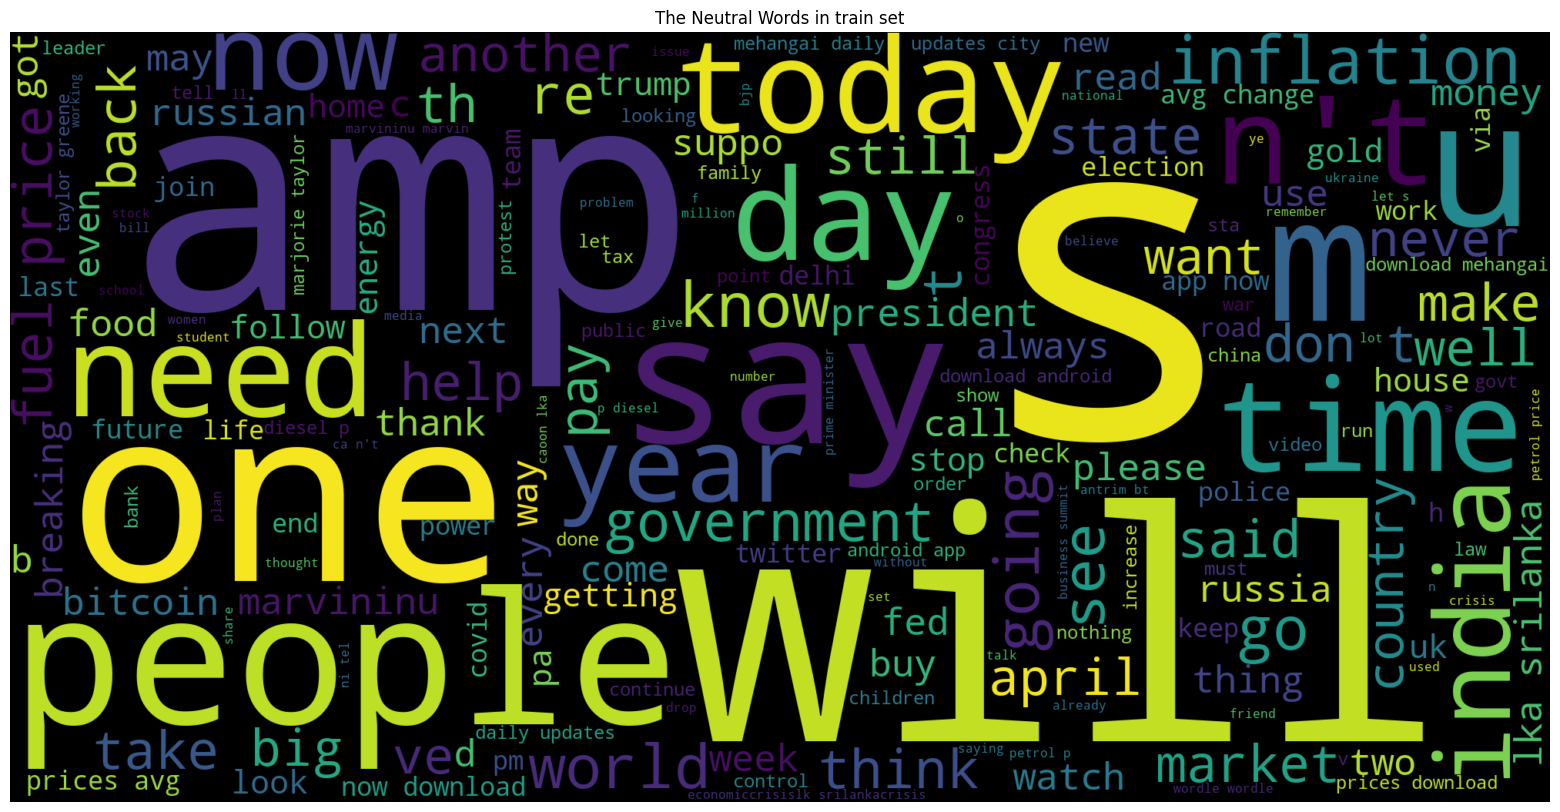

In [ ]:
normal_words =' '.join([text for text in cleaned_data_train['clean_tweet'][cleaned_data_train['polarity'] == 0]])
wordcloud = WordCloud(width=2000, height=1000, random_state = 0).generate(normal_words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words in train set')
plt.show()

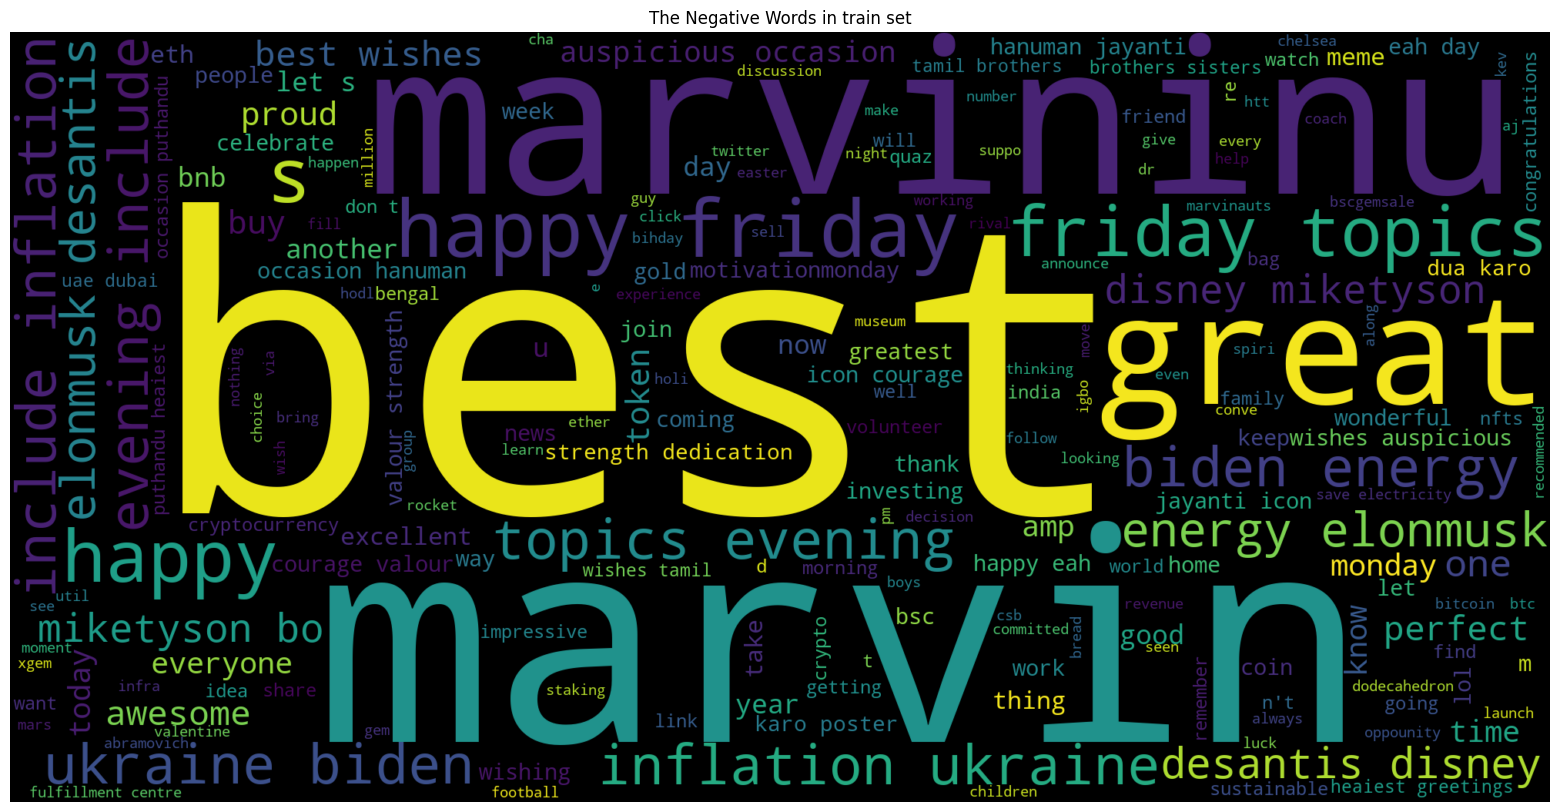

In [ ]:
positive_words =' '.join([text for text in cleaned_data_train['clean_tweet'][cleaned_data_train['polarity'] == 1]])

wordcloud = WordCloud(background_color = 'black', width=2000, height=1000, random_state = 0).generate(positive_words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words in train set')
plt.show()

In [ ]:
# function to collect hashtags
def mention_extract(original_text):
    mentions = []
    # Loop over the words in the tweet
    for text in original_text:
        ht = re.findall(r"@(\w+)",text)
        mentions.append(ht)

    return mentions

def generate_mentions_freqdist(mentions):
    a = nltk.FreqDist(mentions)
    d = pd.DataFrame({'Mentions': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Mentions", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    #plt.savefig(text_query + '_hashtag_frequency_dist.png')
    plt.show()

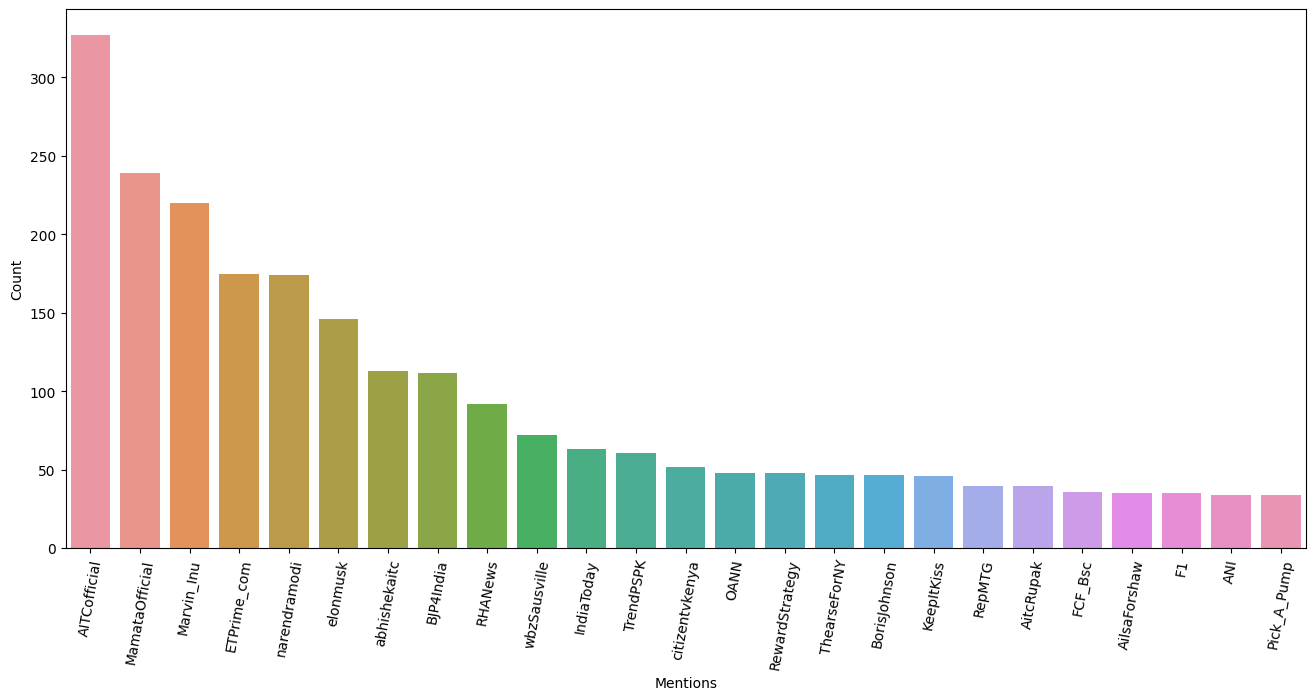

In [ ]:
mentions = mention_extract(cleaned_data_train['original_text'])
mentions = sum(mentions, [])

generate_mentions_freqdist(mentions)

In [69]:
train_df=pd.read_csv('../data/Processed_train.csv')

In [70]:
# Create dataframe for Count of Sentiment Categories
bar_chart_train = train_df['sentiments'].value_counts().rename_axis('Sentiment').to_frame('Total Tweets').reset_index()

In [71]:
import plotly.express as px
sentiments_barchart_train = px.bar(bar_chart_train, x = 'Sentiment', y='Total Tweets', color='Sentiment')

sentiments_barchart_train.update_layout(title='Distribution of Sentiments Results',
                                  margin={"r": 0, "t": 30, "l": 0, "b": 0})

sentiments_barchart_train.show() #Display plot. 

# I used renderer so that the plots show on the web when people view my notebook. 
# For interactive plots, exclude the "renderer" argument
# Note, I further customized the plot on Chart Studio for my Medium post

In [72]:
train_df.groupby('sentiments').describe()

polarity                                                        \
              count      mean       std           min       25%       50%   
sentiments                                                                  
Negative     2691.0 -0.261099  0.230304 -1.000000e+00 -0.375000 -0.178571   
Neutral      7466.0  0.000000  0.000000  0.000000e+00  0.000000  0.000000   
Positive     6315.0  0.342172  0.236230  3.700743e-17  0.150758  0.285714   

                              subjectivity            ... followers_count  \
            75%           max        count      mean  ...             75%   
sentiments                                            ...                   
Negative   -0.1 -9.251859e-18       2691.0  0.498299  ...          2270.0   
Neutral     0.0  0.000000e+00       7466.0  0.070872  ...          1953.0   
Positive    0.5  1.000000e+00       6315.0  0.522885  ...          1953.0   

                      friends_count                                        \
                  max         count         mean          std  min    25%   
sentiments                                                                  
Negative    6027402.0        2691.0  1457.821628  3300.106743  0.0  132.0   
Neutral     6027402.0        7466.0  1321.967051  3039.117464  0.0  101.0   
Positive    6027402.0        6315.0  1309.282977  2728.879703  0.0  113.0   

                                    
              50%     75%      max  
sentiments                          
Negative    472.0  1594.0  41866.0  
Neutral     413.0  1404.0  41866.0  
Positive    445.0  1358.0  41866.0  

[3 rows x 48 columns]

Dropping the rows with neutral polarity

In [74]:
to_drop_train=train_df[train_df['polarity'] == 0 ].index
train_df.drop(to_drop_train , inplace=True)

In [75]:
train_df.shape

(9006, 17)

In [76]:
# To count the iterations 
from tqdm import tqdm
# creating the document corpus
corpus_train = []   
for index, row in tqdm(train_df.iterrows()):
    tweet = preprocessTweets(row['original_text'])
    corpus_train.append(tweet)

9006it [00:06, 1383.27it/s]
